## This notebook will show the initial finidings of time-series analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")


In [3]:
# print head of df
print(df.head())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  351626f25a540a0fccbe42fb815b14ae6c75c15676bf7c...              NaN   
1  f798e1cdba8adfb80ee2aaeea541a55dd32fa8aff38494...                Y   
2  0ad333cd371ec3976f9fac8160ccfc91f0399b48a92b7f...              NaN   
3  dfb3229940c672426c4010d7348d16b69b030191213b86...                Y   
4  821ee3270b2c503fd0905415f674d3f4a63e1ac15d9100...              NaN   

   CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  2018-01-01                  30            NO CONTROLS   
1  2018-01-01                  20            NO CONTROLS   
2  2018-01-01                  25            NO CONTROLS   
3  2018-01-01                  30            NO CONTROLS   
4  2018-01-01                  35            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0           NO CONTROLS             CLEAR                 UNKNOWN   
1           NO CONTROLS             CLEAR                DAYLI

In [4]:
# Check for missing data: Look at difference in time between records and plot d/t

# Create new df to look at time differences (and only including certain columns)
columns_to_keep = [ # selected columns to keep for analysis
    "CRASH_DATETIME", "CRASH_DATE", "CRASH_TIME", "CRASH_DAY_OF_WEEK", "Day_Of_Year",
    "Hour_Of_Day", "Hour_Of_Week", "LATITUDE", "LONGITUDE",
    "WEATHER_CONDITION", "LIGHTING_CONDITION"
]
# Create a new DataFrame with selected columns
df_time_diff = df[columns_to_keep].copy()

# Compute the time difference (Δt) between consecutive crashes in minutes
df_time_diff['CRASH_DATETIME'] = pd.to_datetime(df_time_diff['CRASH_DATETIME'])
df_time_diff['Time_Difference'] = df_time_diff['CRASH_DATETIME'].diff().dt.total_seconds() / 60  # Convert to minutes

# Drop the first row since the first time difference is NaN
df_time_diff = df_time_diff.dropna()

# Reset index for clarity
df_time_diff = df_time_diff.reset_index(drop=True)

# print the first few rows of the new DataFrame
print(df_time_diff.head())

       CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  Day_Of_Year  \
0 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
1 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
2 2018-01-01 00:05:00  2018-01-01   00:05:00                  1            1   
3 2018-01-01 00:07:00  2018-01-01   00:07:00                  1            1   
4 2018-01-01 00:20:00  2018-01-01   00:20:00                  1            1   

   Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE WEATHER_CONDITION  \
0            0             0  41.800575 -87.589225             CLEAR   
1            0             0  41.681735 -87.641014           UNKNOWN   
2            0             0  41.949417 -87.668774             CLEAR   
3            0             0  41.683946 -87.622993              SNOW   
4            0             0  41.985479 -87.659979              SNOW   

       LIGHTING_CONDITION  Time_Difference  
0                DAYLIGHT              0.

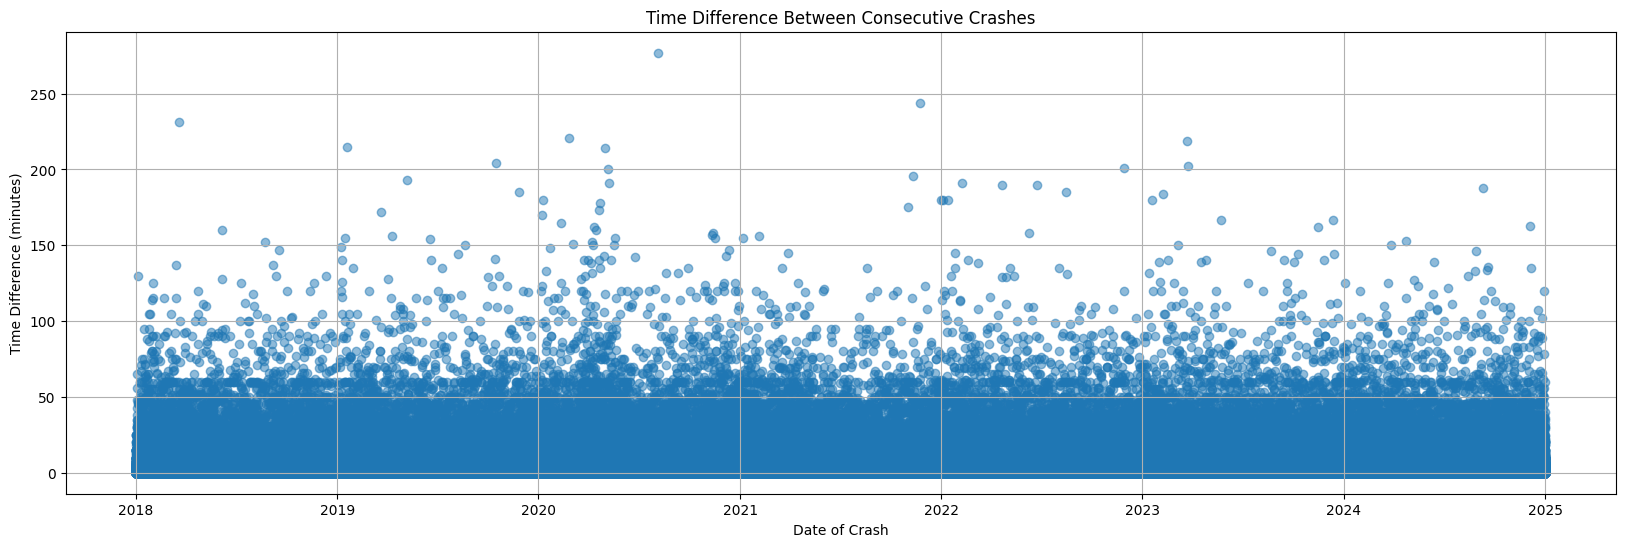

In [5]:
# plot the time differences as a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df_time_diff['CRASH_DATETIME'], df_time_diff['Time_Difference'], alpha=0.5)
plt.title('Time Difference Between Consecutive Crashes')
plt.xlabel('Date of Crash')
plt.ylabel('Time Difference (minutes)')
plt.grid()


We can't see gaps of data in the scatterplot because there's too many data points. We need to query the dataframe directly.

In [6]:
# Return top 50 maximum time differences
print(df_time_diff['Time_Difference'].nlargest(50)) #in minutes


287935    277.0
424268    244.0
24037     231.0
251132    221.0
564161    219.0
123246    215.0
263872    214.0
211318    204.0
564710    202.0
532823    201.0
264935    200.0
420593    196.0
157571    193.0
265103    191.0
444921    191.0
464600    190.0
484548    190.0
728558    188.0
224531    185.0
500424    185.0
551930    184.0
237619    180.0
434522    180.0
435476    180.0
437667    180.0
546227    180.0
262232    178.0
417920    175.0
261954    173.0
142385    172.0
237078    170.0
583514    167.0
646320    167.0
246490    165.0
754845    163.0
260822    162.0
638455    162.0
49347     160.0
261196    160.0
315584    158.0
479901    158.0
314875    157.0
148645    156.0
334675    156.0
122384    155.0
267287    155.0
316532    155.0
327887    155.0
171812    154.0
683537    153.0
Name: Time_Difference, dtype: float64


The maximum time between any crash is only a couple of hours. There are no large gaps in the data.

In [7]:
# Check for errors in data: are there 0s?
print(df_time_diff[df_time_diff['Time_Difference'] == 0])

            CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  \
0      2018-01-01 00:00:00  2018-01-01   00:00:00                  1   
1      2018-01-01 00:00:00  2018-01-01   00:00:00                  1   
12     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
13     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
14     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
...                    ...         ...        ...                ...   
762707 2024-12-31 22:50:00  2024-12-31   22:50:00                  2   
762710 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762711 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762712 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762713 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   

        Day_Of_Year  Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE  \
0                 1            0             0  41.800575 -87.5

Let's begin a time-series analysis on this data.

In [8]:
# Ensure CRASH_DATE is in datetime format (if not already)
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Aggregate total crashes per day
df_crashes_per_day = df.groupby("CRASH_DATE").size().reset_index(name="Total_Crashes")

# Display the first few rows
print(df_crashes_per_day.head())

  CRASH_DATE  Total_Crashes
0 2018-01-01            337
1 2018-01-02            452
2 2018-01-03            383
3 2018-01-04            360
4 2018-01-05            373


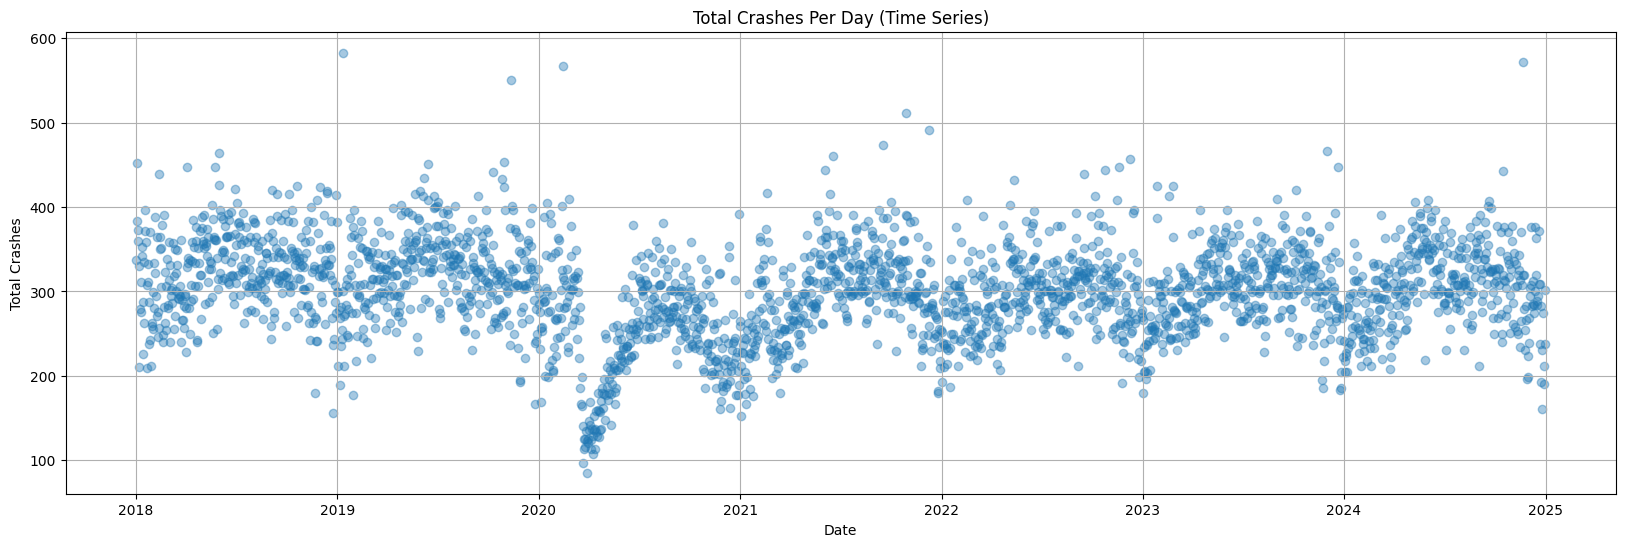

In [9]:
# Plot total crashes per day
plt.figure(figsize=(20, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4)
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Total Crashes Per Day (Time Series)")
plt.grid(True)
plt.show()

Wow! There is a lot of noise, but there appears to be an upside-down U pattern that happens on a yearly basis. 
We can also see the huge dip in crashes that happened at the beginning of 2020. Could be sinusoidal? 

In [10]:
# Check minimum crash counts per day
print(df_crashes_per_day["Total_Crashes"].min())


85


In [11]:
print(df_crashes_per_day.head())

  CRASH_DATE  Total_Crashes
0 2018-01-01            337
1 2018-01-02            452
2 2018-01-03            383
3 2018-01-04            360
4 2018-01-05            373


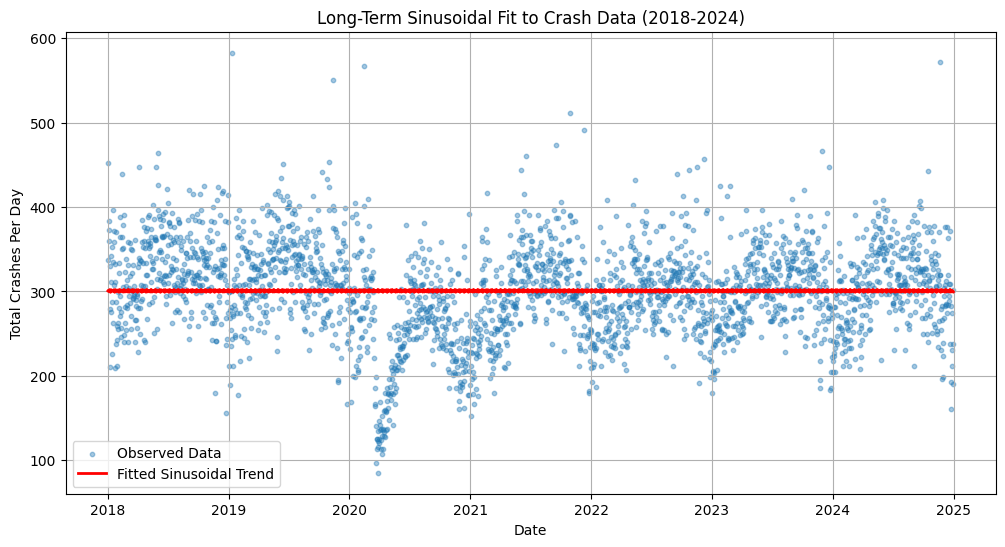

In [12]:
import numpy as np
from scipy.optimize import curve_fit

# Convert CRASH_DATE to a numerical format (days since start of dataset)
df_crashes_per_day["Days_Since_Start"] = (df_crashes_per_day["CRASH_DATE"] - df_crashes_per_day["CRASH_DATE"].min()).dt.days

# Define a sinusoidal function with a long-term period
def long_term_sinusoid(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Fit the function to the data
params, _ = curve_fit(long_term_sinusoid, df_crashes_per_day["Days_Since_Start"], df_crashes_per_day["Total_Crashes"])

# Generate predictions
x_values = np.linspace(0, df_crashes_per_day["Days_Since_Start"].max(), 1000)  # Smooth curve
y_pred = long_term_sinusoid(x_values, *params)

# Plot the observed data and fitted sinusoidal trend
plt.figure(figsize=(12, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4, s=10, label="Observed Data")
plt.plot(df_crashes_per_day["CRASH_DATE"].min() + pd.to_timedelta(x_values, unit='D'), y_pred, color="red", linewidth=2, label="Fitted Sinusoidal Trend")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Long-Term Sinusoidal Fit to Crash Data (2018-2024)")
plt.legend()
plt.grid(True)
plt.show()


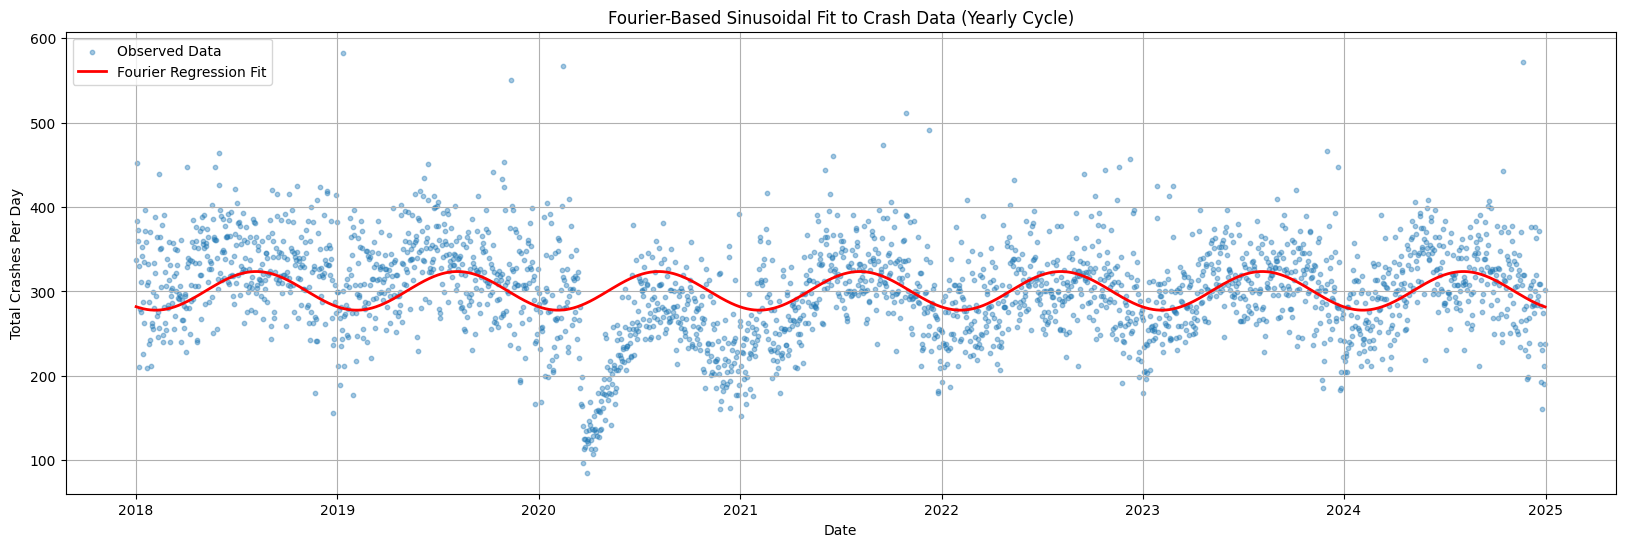

In [13]:
from sklearn.linear_model import LinearRegression

# Convert date to number of days since the start
df_crashes_per_day["Days_Since_Start"] = (df_crashes_per_day["CRASH_DATE"] - df_crashes_per_day["CRASH_DATE"].min()).dt.days

# faurier regression equations: A + Bsin(2πt/P) + Ccos(2πt/P)
# A, B, and C are coefficients
# t is the time variable (days since start)
# P is the period of the cycle (365 days for yearly cycle)


# Define the cycle period (365 days for yearly)
P = 365

# Create sine and cosine terms
df_crashes_per_day["Sin_Term"] = np.sin(2 * np.pi * df_crashes_per_day["Days_Since_Start"] / P)
df_crashes_per_day["Cos_Term"] = np.cos(2 * np.pi * df_crashes_per_day["Days_Since_Start"] / P)

# Define X (independent variables) and Y (dependent variable)
X = df_crashes_per_day[["Sin_Term", "Cos_Term"]]  # Features (sin & cos terms)
y = df_crashes_per_day["Total_Crashes"]  # Target variable

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Get coefficients
A = reg.intercept_
B, C = reg.coef_

# Generate predictions
df_crashes_per_day["Fourier_Prediction"] = A + B * df_crashes_per_day["Sin_Term"] + C * df_crashes_per_day["Cos_Term"]

# Plot the results
plt.figure(figsize=(20, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4, s=10, label="Observed Data")
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Fourier_Prediction"], color="red", linewidth=2, label="Fourier Regression Fit")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Fourier-Based Sinusoidal Fit to Crash Data (Yearly Cycle)")
plt.legend()
plt.grid(True)
plt.show()


What does this graph show us? What can we learn from this?

Helps to predict crash rates based o ntime of year. Looking at monthly cycles and not weekly cycles. (Just looking at each day and not a Sunday in January)

Trying to set up prophet

In [14]:
# in terminal run: pip install prophet
#from fbprophet import Prophet

df_prophet = df_crashes_per_day.rename(columns={"CRASH_DATE": "ds", "Total_Crashes": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]) # date formatting
print(df_prophet.head())

          ds    y  Days_Since_Start  Sin_Term  Cos_Term  Fourier_Prediction
0 2018-01-01  337                 0  0.000000  1.000000          281.828518
1 2018-01-02  452                 1  0.017213  0.999852          281.606744
2 2018-01-03  383                 2  0.034422  0.999407          281.390614
3 2018-01-04  360                 3  0.051620  0.998667          281.180192
4 2018-01-05  373                 4  0.068802  0.997630          280.975541


In [15]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(df_prophet)

# Create future dates for the next 365 days
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

Importing plotly failed. Interactive plots will not work.
22:38:35 - cmdstanpy - INFO - Chain [1] start processing
22:38:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,271.815019,216.271556,327.706793
1,2018-01-02,280.429710,227.928976,338.233701
2,2018-01-03,277.977719,222.936941,334.932943
3,2018-01-04,283.967588,229.303780,336.018652
4,2018-01-05,321.424156,265.477972,373.570845


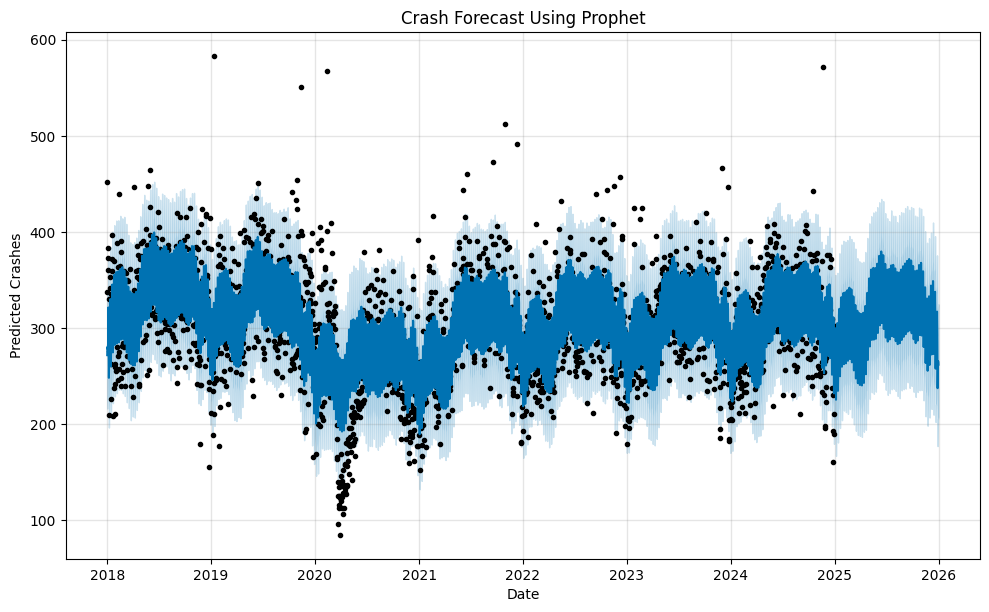

In [16]:
# Plot forecast
model.plot(forecast)
plt.title("Crash Forecast Using Prophet")
plt.xlabel("Date")
plt.ylabel("Predicted Crashes")
plt.grid(True)
plt.show()


Crash Forecast results:

This graph shows the predicted number of crashes per day 2018 through 2026, and was modeled on the data from 2018-2024.

Key Components of the Graph
- Black Dots =  Observed Data (Actual recorded crashes per day).
- Dark Blue Line = Model’s Predicted Trend (yhat), showing the expected number of crashes.
- Light Blue Shaded Area = Uncertainty Interval (confidence range for predictions).
-- Darker blue = Higher confidence in the forecast.
-- Lighter blue (outer edges) = Higher uncertainty in future predictions.

What This Forecast Tells Us

 1. The Model Captures Seasonality Well
- The trend clearly shows repeated dips and rises within each year, suggesting strong weekly and yearly seasonal patterns.
- Notice the dip in 2020—this aligns with COVID-19 lockdowns, when fewer people were on the road.

 2. Model Confidence Decreases in the Future
- The blue shaded area expands as we move further into the future (2025-2026).
- This makes sense because as time goes on, uncertainty increases, and Prophet reflects this by widening the confidence intervals.

 3. The Model Predicts a Stable Trend in Crashes
- Despite short-term variations, the long-term trend is relatively stable, meaning crashes are not increasing or decreasing significantly.

 4. The Model Handles Extreme Values Reasonably
- Some black dots (actual crash counts) are well outside the prediction intervals, which means occasional extreme values (high or low crash days) are not fully captured by the model.
- This suggests the presence of outliers or events (e.g., holidays, storms) that weren’t explicitly modeled.

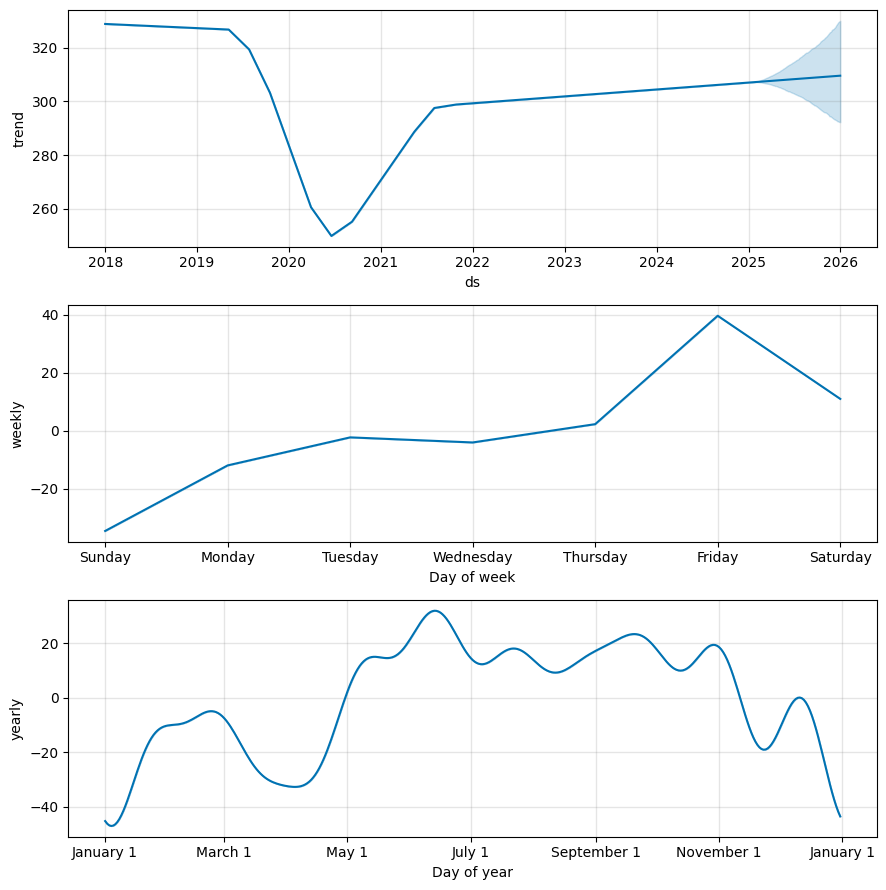

In [17]:
model.plot_components(forecast)
plt.show()


Let's interpret each of the three components plots:

1. Trend Component:

- This graph shows the general trend in crash rates over time. 
- There is a sharp dip in 2020 which corresponds to the COVID19 lockdowns, where fewer cars were on the road. 
- After 2021, crash rates return to pre-pandemic levels with a slight upward trend.
- The blue shaded area at the end represents the forecast for crash rates in 2025-2026. 

2. Weekly Seasonality Component:
 
- This graph shows crash trends for each day of the week
- Friday has the highest number of crashes, while Sunday has the lowest
- There's a steady increase in crashes from Sunday to Friday, and then a drop on Saturday
- These patterns seem to align with common driving behaviors (workweek vs weekend traffic)

3. Yearly Seasonality Component:

- This graph shows how crash rates fluctuate throughout the calendar year.
- Crashes are lowest in January, likely due to low travel rates in the winter in Chicago
- Crash rates peak around late spring and early summer (May-July). This aligns with more driving during the summer months (and more tourists)
- Another peak in September-November. This is possibly due to increased travel and holiday traffic, and perhaps school schedules.
- Sharp decline after Thanksgiving and December holidays.

-------------

Let's compute the residuals on the main graph above. 
* The model is taking account of weekly/yearly cycles so we should see if there's any patterns left. (There might be some autocorrelation)


In [18]:
print(df_prophet.head())
print(forecast.head())

          ds    y  Days_Since_Start  Sin_Term  Cos_Term  Fourier_Prediction
0 2018-01-01  337                 0  0.000000  1.000000          281.828518
1 2018-01-02  452                 1  0.017213  0.999852          281.606744
2 2018-01-03  383                 2  0.034422  0.999407          281.390614
3 2018-01-04  360                 3  0.051620  0.998667          281.180192
4 2018-01-05  373                 4  0.068802  0.997630          280.975541
          ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2018-01-01  328.762445  216.271556  327.706793   328.762445   328.762445   
1 2018-01-02  328.758203  227.928976  338.233701   328.758203   328.758203   
2 2018-01-03  328.753962  222.936941  334.932943   328.753962   328.753962   
3 2018-01-04  328.749720  229.303780  336.018652   328.749720   328.749720   
4 2018-01-05  328.745478  265.477972  373.570845   328.745478   328.745478   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \

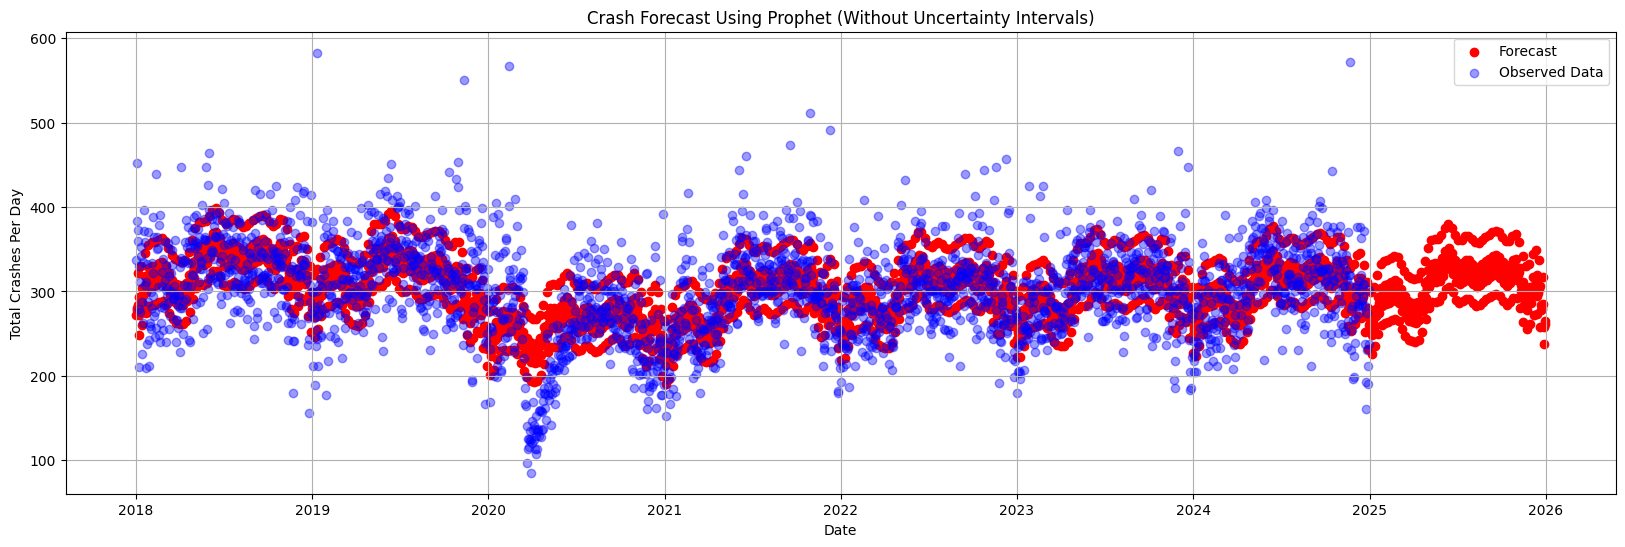

In [19]:
# Plot forecast (without the upper and lower bounds)
plt.figure(figsize=(20, 6))
plt.scatter(forecast["ds"], forecast["yhat"], color="red", label="Forecast")
plt.scatter(df_prophet["ds"], df_prophet["y"], alpha=0.4, color="blue", label="Observed Data")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Crash Forecast Using Prophet"
" (Without Uncertainty Intervals)")
plt.legend()
plt.grid(True)
plt.show()


This graph shows us the predicted vs actual crash rate values. We can see in the prediction for 2026 that there are 3 different "layers" of the forcast. This is probably due to the highest crash rates around Fridays, and the lowest around Sundays. 

Let's look at the residuals of this graph.

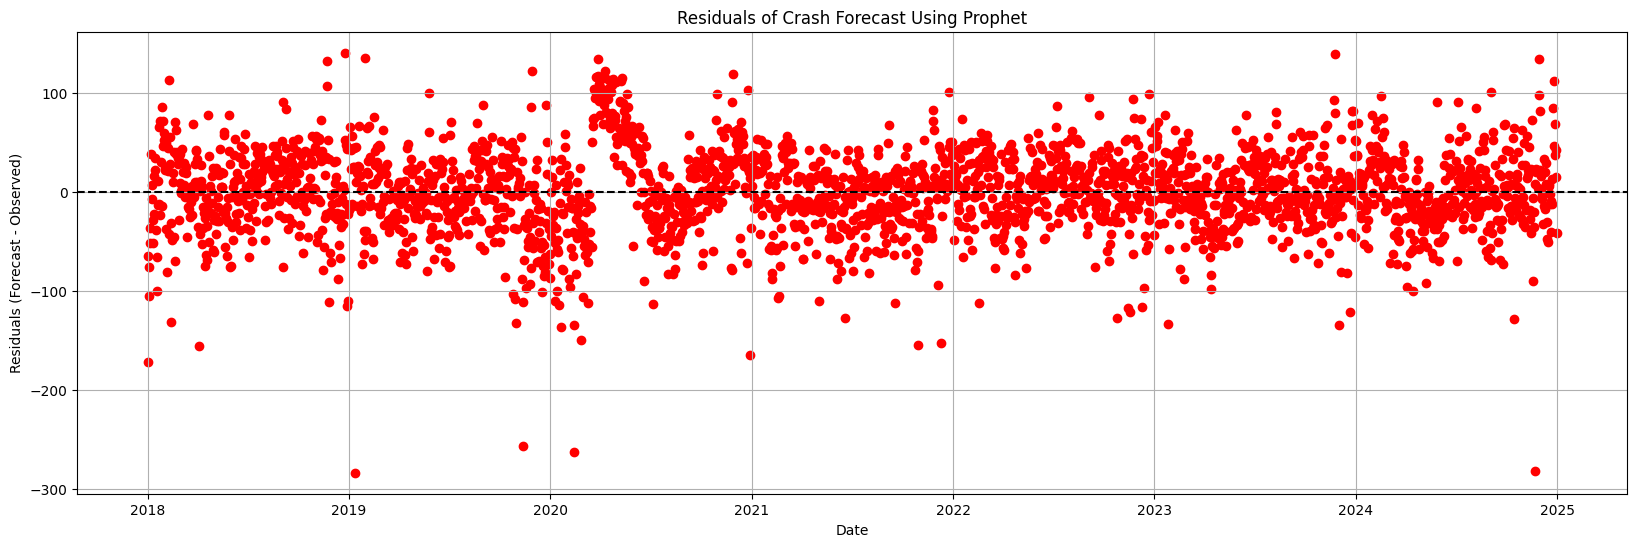

In [20]:
# Plot residuals (forecast - observed)
plt.figure(figsize=(20, 6))
plt.scatter(forecast["ds"], forecast["yhat"] - df_prophet["y"], color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Residuals (Forecast - Observed)")
plt.title("Residuals of Crash Forecast Using Prophet")
plt.grid(True)
plt.show()


There doesn't appear to be any noticible trends in the residuals graph. This shows that the weekly and yearly cycles account for the patterns in the data. 

We can see during 2020 there is some kind of pattern in the residuals. It seems that early in the year the forecast overpredicts the amount of crashes, and then midway through the year, the model underpredicts the amount of crashes. 

There also seem to be some extreme values where the prediction was way off (Jan 2019, Nov 2019, Feb 2020, Nov 2024). What is the significance of these days?

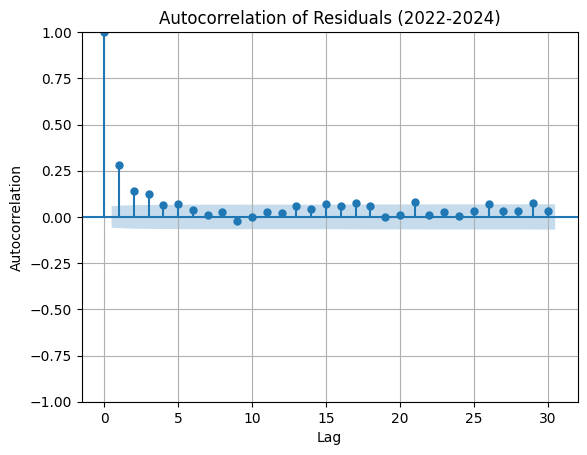

In [21]:
# Run autocorrelation plot on residuals from 2022-2024

# pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Extract residuals from 2022-2024
residuals = forecast[forecast["ds"].dt.year.isin([2022, 2023, 2024])]["yhat"] - df_prophet["y"]
residuals = residuals.dropna()

# Plot autocorrelation
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals (2022-2024)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()



Interpreting the Autocorrelation of Residuals (2018-2024):
This autocorrelation function (ACF) plot tells us how much the residuals (forecast errors) are correlated with themselves at different time lags. In other words, does an error today influence errors tomorrow, next week, or in the future?

Key Components of the Graph
- Lag (x-axis) → The number of days in the past we are comparing residuals to.
- Autocorrelation (y-axis) → Measures how similar past residuals are to current residuals.
- Blue bars → Confidence intervals (if points fall outside these bars, autocorrelation is significant).
- Dots (autocorrelation values) → If a dot is significantly above or below zero, it suggests a pattern that the model did not fully capture.

- The first point at lag 0 is always 1 because residuals are perfectly correlated with themselves.
- Some autocorrelation is present at lags 1-5, meaning there may be short-term dependencies in crash rates that weren’t fully captured by the model.
- There seems to be no strong weekly or yearly seasonality left in the residuals. If the model had missed weekly or yearly seasonality, we would expect spikes at lags 7, 14, etc. Since those spikes are not present, it suggests Prophet already captured most of the seasonality.
- Most values are within the blue confidence interval, meaning the errors do not show strong patterns. This suggests the model does a good job at capturing trends and seasonality.

Let's fit an ARIMAX model on the residuals from the prophet forecast

I need to rerun all of the forecasts but just looking at 2022-2024. 2020 and 2021 data were heavily affected by COVID and we should skip over these two years.


22:52:24 - cmdstanpy - INFO - Chain [1] start processing
22:52:24 - cmdstanpy - INFO - Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  240.171026  194.505195  284.224866
1 2022-01-02  200.081308  156.469619  244.345989
2 2022-01-03  212.919908  169.149022  255.563596
3 2022-01-04  228.338073  181.482727  273.309318
4 2022-01-05  227.807076  180.924475  271.280027


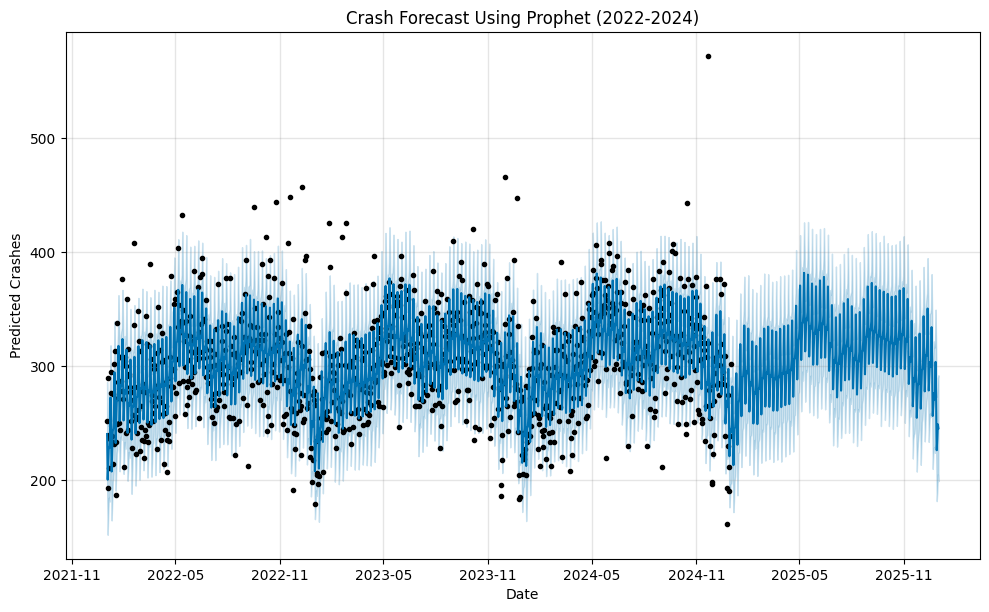

In [38]:
# Filter data to only include 2022-2024 (excluding COVID years)
df_prophet_filtered = df_prophet[df_prophet["ds"].dt.year.isin([2022, 2023, 2024])].copy()

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model on 2022-2024 data
model.fit(df_prophet_filtered)

# Create future dates for the next 365 days (1 year forecast)
future = model.make_future_dataframe(periods=365) # using future includes all dates from df_prophet_filtered AND future dates for 2025

# Forecast
forecast_22_24 = model.predict(future) #forecast contains past and future predictions
    # this includes all training data (ds values from df_prophet_filtered) and future dates (ds values from future)

# Display forecasted values
print(forecast_22_24[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Plot forecast
model.plot(forecast)
plt.title("Crash Forecast Using Prophet (2022-2024)")
plt.xlabel("Date")
plt.ylabel("Predicted Crashes")
plt.grid(True)
plt.show()

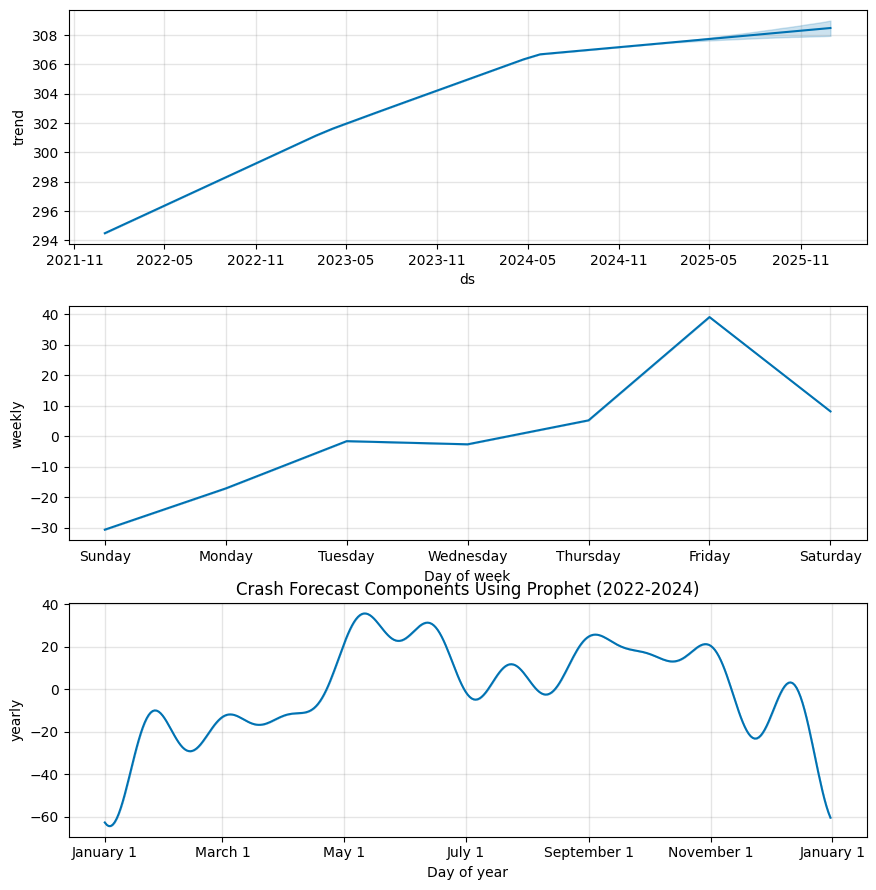

In [34]:
# Show trend and seasonality components
model.plot_components(forecast)
plt.title("Crash Forecast Components Using Prophet (2022-2024)")
plt.show()

In [41]:
# Create future dataframe only for the training period (NO 2025 FORECAST)
train_only_22_24 = df_prophet_filtered[["ds"]]  # Use only observed dates, no future dates

# Generate forecast only for these dates
forecast_22_24_new_train = model.predict(train_only_22_24)

In [45]:
print(train_only_22_24.head())
print(forecast_22_24_new_train.head())

             ds
1461 2022-01-01
1462 2022-01-02
1463 2022-01-03
1464 2022-01-04
1465 2022-01-05
          ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-01-01  294.493628  195.120631  284.741817   294.493628   294.493628   
1 2022-01-02  294.509300  152.501544  246.986469   294.509300   294.509300   
2 2022-01-03  294.524971  169.504881  257.030217   294.524971   294.524971   
3 2022-01-04  294.540643  184.844051  275.611831   294.540643   294.540643   
4 2022-01-05  294.556315  182.790487  271.636143   294.556315   294.556315   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      -54.322602            -54.322602            -54.322602   8.096461   
1      -94.427992            -94.427992            -94.427992 -30.709352   
2      -81.605064            -81.605064            -81.605064 -17.181098   
3      -66.202570            -66.202570            -66.202570  -1.673748   
4      -66.749239            -66.749239            -66.

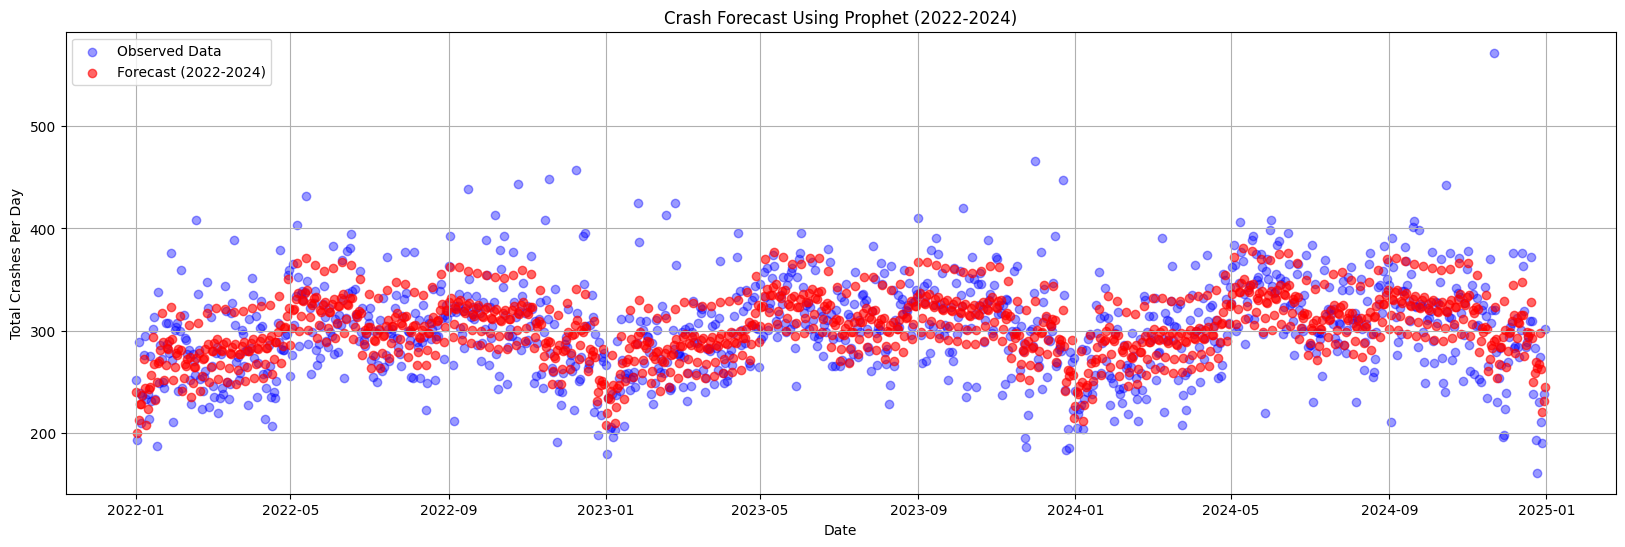

In [42]:
# Plot observed vs. forecasted crashes for 2022-2024 data

plt.figure(figsize=(20, 6))
plt.scatter(df_prophet_filtered["ds"], df_prophet_filtered["y"], alpha=0.4, color="blue", label="Observed Data")
plt.scatter(forecast_22_24_new_train["ds"], forecast_22_24_new_train["yhat"], color="red", label="Forecast (2022-2024)", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Crash Forecast Using Prophet (2022-2024)")
plt.legend()
plt.grid(True)
plt.show()


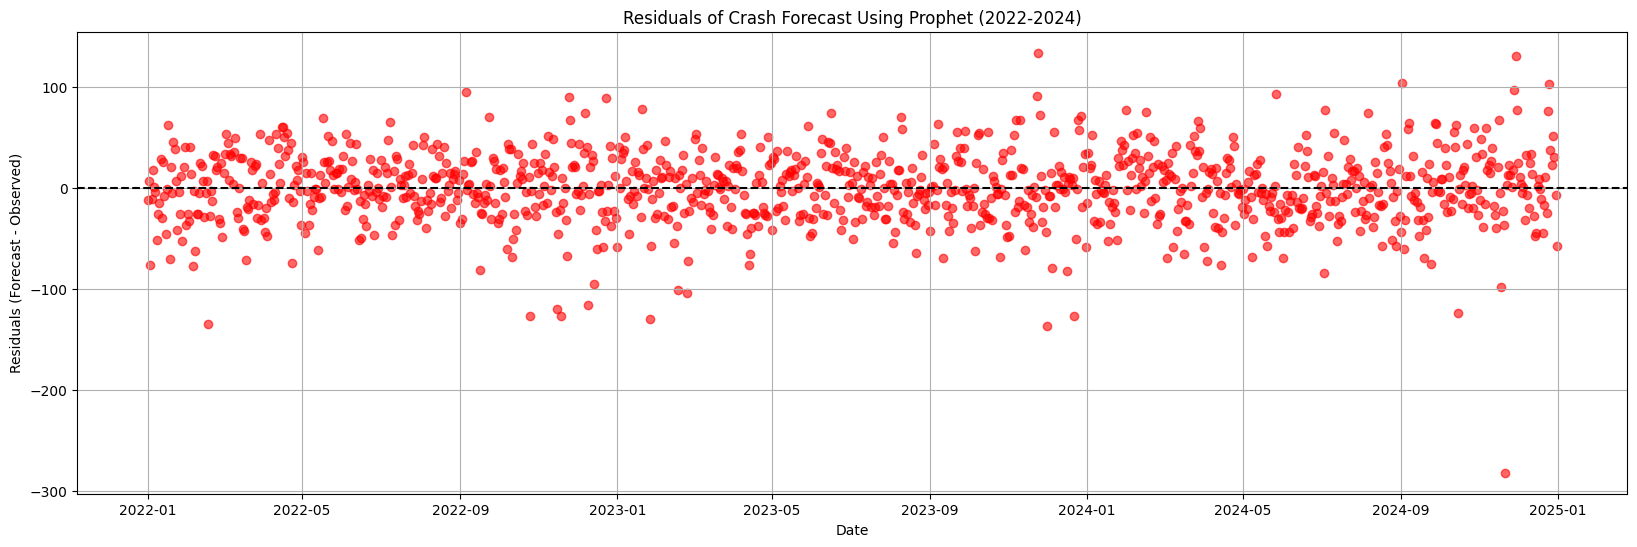

In [43]:
# Compute residuals (Forecast - Observed)
residuals = forecast_22_24_new_train["yhat"].values - df_prophet_filtered["y"].values

# Plot residuals scatterplot
plt.figure(figsize=(20, 6))
plt.scatter(forecast_22_24_new_train["ds"], residuals, color="red", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")  # Add horizontal line at y=0

# Labels & title
plt.xlabel("Date")
plt.ylabel("Residuals (Forecast - Observed)")
plt.title("Residuals of Crash Forecast Using Prophet (2022-2024)")
plt.grid(True)
plt.show()


The residuals graph when forecasting just on 2022 through 2024 shows a very even and distribution. There are no trends or outliers.

<Figure size 1000x500 with 0 Axes>

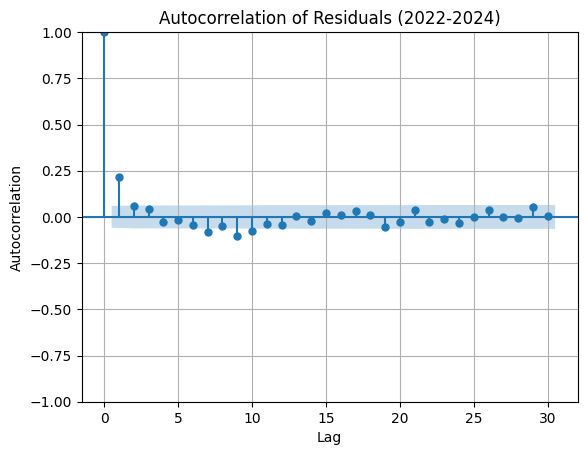

In [44]:
# Run autocorrelation plot on residuals from 2022-2024

# pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf
residuals = forecast_22_24_new_train["yhat"].values - df_prophet_filtered["y"].values
residuals = pd.Series(residuals).dropna()

# Autocorrelation plot
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals (2022-2024)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


Let's take a look at Holt-Winters Smoothing

# What is Holt-Winters Smoothing?
Holt-Winters is a forecasting technique that smooths a time series using three components:

Level (α - Alpha): The base value of the series.
Trend (β - Beta): The long-term increase or decrease.
Seasonality (γ - Gamma): The repeating pattern (e.g., weekly cycle in crash data).

# Why Use Holt-Winters?

Better at handling seasonality than ARIMA.
Can adapt to changing trends over time.
Works well for short-term forecasts (e.g., weekly patterns).

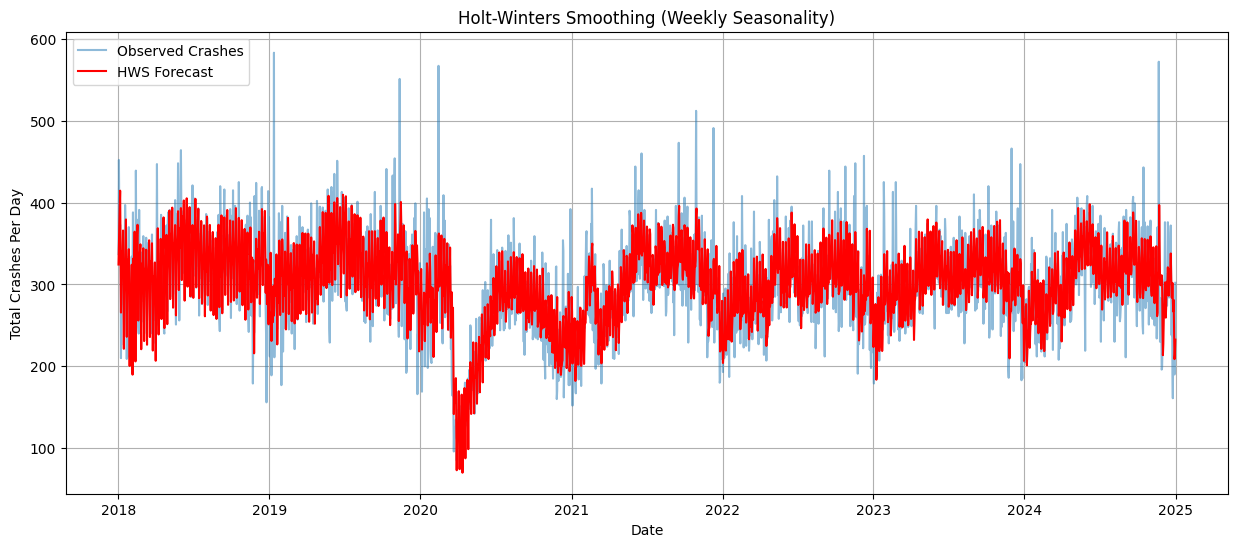

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Apply Holt-Winters Smoothing (weekly seasonality)
hws_model = ExponentialSmoothing(
    df_crashes_per_day["Total_Crashes"],  # Target variable
    trend="add",  # Linear trend
    seasonal="add",  # Additive seasonality
    seasonal_periods=7  # Weekly seasonality
).fit(0.2) # adjust smoothing level

# Generate predictions
df_crashes_per_day["HWS_Forecast"] = hws_model.fittedvalues

# Plot original vs. smoothed values
plt.figure(figsize=(15, 6))
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], label="Observed Crashes", alpha=0.5)
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["HWS_Forecast"], label="HWS Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Holt-Winters Smoothing (Weekly Seasonality)")
plt.legend()
plt.grid(True)
plt.show()


The HWS prediction line follows the observed data closely. This means that the weekly seasonality is being captured well. 


The smoothing_level (α) controls how fast the model adapts to changes:
- Low values (e.g., 0.1 - 0.3) = Slower adaptation, smoother trend.
- High values (e.g., 0.7 - 1.0) = Faster adaptation, reacts quickly to recent changes.

After playing around with multiple alpha values, the alpha value at 0.2 seems to fit the data well. 

There are two types of HWS models: Additive and Multiplicative. Let's compare the two models to see which better fits this time series data

- Additive (seasonal="add") = Assumes crash fluctuations are consistent in magnitude.
- Multiplicative (seasonal="mul") = Assumes fluctuations grow or shrink over time.

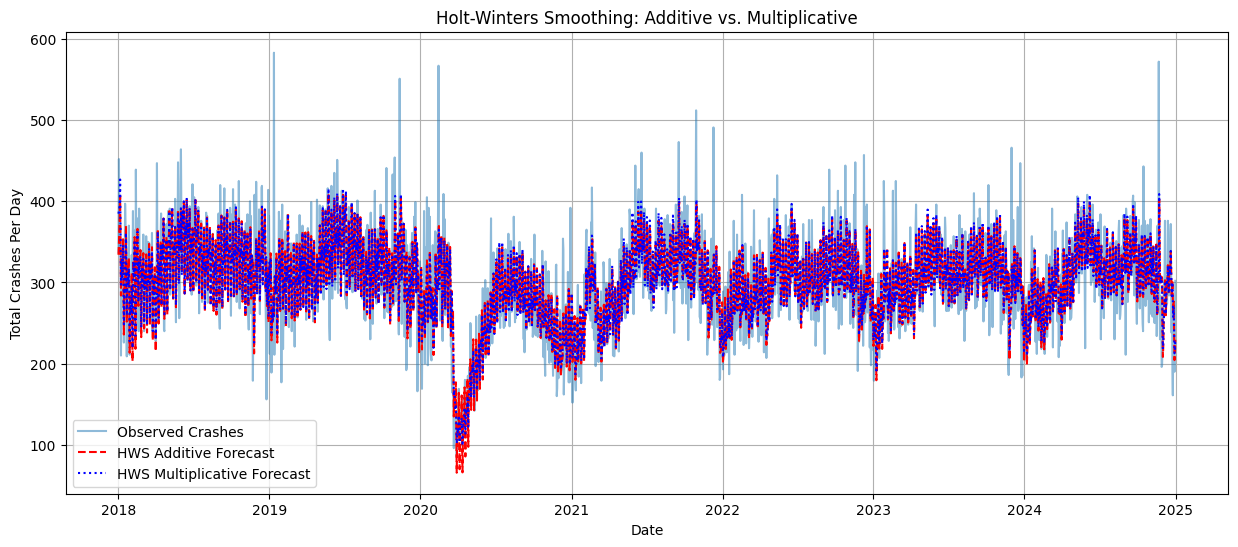

In [30]:
# Additive Holt-Winters Model (weekly seasonality)
hws_add = ExponentialSmoothing(
    df_crashes_per_day["Total_Crashes"],
    trend="add",
    seasonal="add",
    seasonal_periods=7
).fit()

# Multiplicative Holt-Winters Model (weekly seasonality)
hws_mul = ExponentialSmoothing(
    df_crashes_per_day["Total_Crashes"],
    trend="add",
    seasonal="mul",
    seasonal_periods=7
).fit()

# Store results
df_crashes_per_day["HWS_Add_Forecast"] = hws_add.fittedvalues
df_crashes_per_day["HWS_Mul_Forecast"] = hws_mul.fittedvalues

# Plot both models
plt.figure(figsize=(15, 6))
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], label="Observed Crashes", alpha=0.5)
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["HWS_Add_Forecast"], label="HWS Additive Forecast", color="red", linestyle="dashed")
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["HWS_Mul_Forecast"], label="HWS Multiplicative Forecast", color="blue", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Holt-Winters Smoothing: Additive vs. Multiplicative")
plt.legend()
plt.grid(True)
plt.show()


The above graph compares the Holt-Winters Smoothing with Additive and Multiplicative Seasonality:

1. Both models capture the seasoanlity well
- Both the red and blue line follow the weekly fluctuations well -> this suggests weekly seasonality is strong 

2. The multiplicative odel (blue) is more "conservative" in certain areas
- We can see this in 2020 with the COVID dip
- Also can see this in early 2018, early 2019, early 2023, and early 2024. 
- The multiplicative model does not react as strongly as the additive model

Why does the multiplicative not react as strongly?
- Multiplicative seasonality scales proportionally, meaning it shrinks fluctuations when crash counts are lower (2020) and expands them when counts are higher (2023).
- The additive model (red) fluctuates more aggressively, assuming fixed seasonal patterns regardless of the overall trend.


Multiplicative model might be better for long-term stability:
- Since the amplitude of seasonal fluctuations changes over time, the multiplicative model might be better at capturing long-term trends.
- However, if the seasonality is truly constant over time, then the additive model is better.


We should note that both models struggle slightly with extreme spikes. Sharp peaks (early 2019, late 2024) are not fully captured by either model. This could suggest that daily crash data has unpredictable spikes (possibly from weather, holidays, or traffic events).


In [32]:
# Compare the two Holt-Winters models (additive and multiplicative) using MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute MAE & RMSE for the full dataset (2018-2024)
mae_add = mean_absolute_error(df_crashes_per_day["Total_Crashes"], df_crashes_per_day["HWS_Add_Forecast"])
rmse_add = np.sqrt(mean_squared_error(df_crashes_per_day["Total_Crashes"], df_crashes_per_day["HWS_Add_Forecast"]))

mae_mul = mean_absolute_error(df_crashes_per_day["Total_Crashes"], df_crashes_per_day["HWS_Mul_Forecast"])
rmse_mul = np.sqrt(mean_squared_error(df_crashes_per_day["Total_Crashes"], df_crashes_per_day["HWS_Mul_Forecast"]))

# Compute errors for 2022-2024
df_2022_2024 = df_crashes_per_day[(df_crashes_per_day["CRASH_DATE"] >= "2022-01-01") & 
                                  (df_crashes_per_day["CRASH_DATE"] <= "2024-12-31")]

mae_add_22_24 = mean_absolute_error(df_2022_2024["Total_Crashes"], df_2022_2024["HWS_Add_Forecast"])
rmse_add_22_24 = np.sqrt(mean_squared_error(df_2022_2024["Total_Crashes"], df_2022_2024["HWS_Add_Forecast"]))

mae_mul_22_24 = mean_absolute_error(df_2022_2024["Total_Crashes"], df_2022_2024["HWS_Mul_Forecast"])
rmse_mul_22_24 = np.sqrt(mean_squared_error(df_2022_2024["Total_Crashes"], df_2022_2024["HWS_Mul_Forecast"]))

# Create a DataFrame to store the results
error_metrics = pd.DataFrame({
    "Model": ["HWS Additive", "HWS Multiplicative"],
    "MAE (2018-2024)": [mae_add, mae_mul],
    "RMSE (2018-2024)": [rmse_add, rmse_mul],
    "MAE (2022-2024)": [mae_add_22_24, mae_mul_22_24],
    "RMSE (2022-2024)": [rmse_add_22_24, rmse_mul_22_24]
})

# Display the results
print(error_metrics)

                Model  MAE (2018-2024)  RMSE (2018-2024)  MAE (2022-2024)  \
0        HWS Additive        29.085822         39.688424        28.760243   
1  HWS Multiplicative        29.016884         39.551900        28.597127   

   RMSE (2022-2024)  
0         38.147641  
1         38.019450  


------------
Let's compare the Holt-Winters forecast to the Prophet forecast. Which is better?

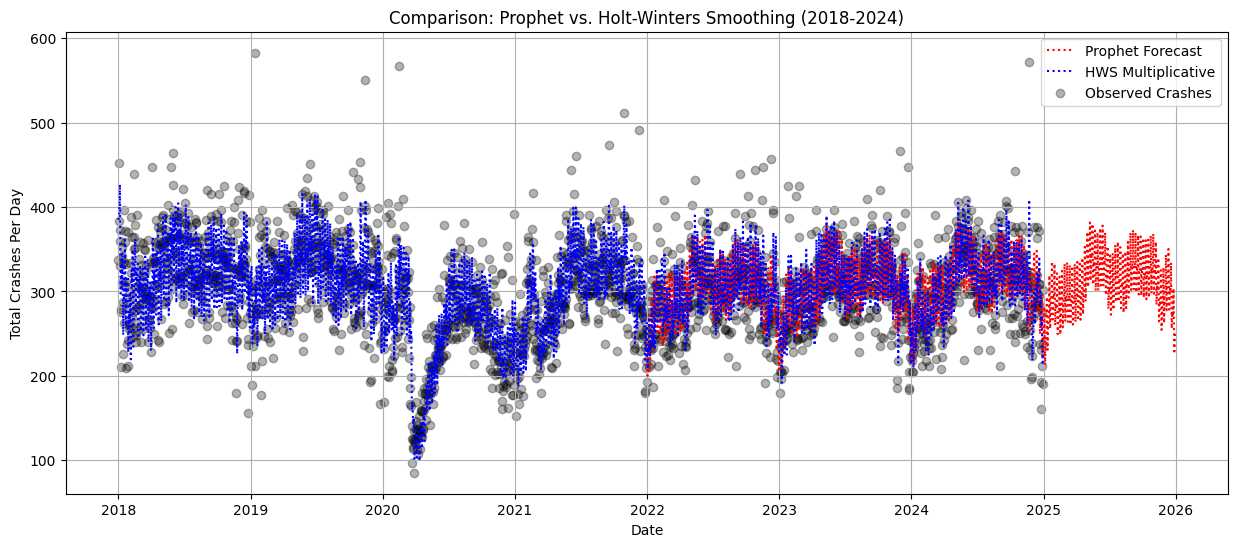

In [37]:
# Plot Prophet Forecast vs. Holt-Winters
plt.figure(figsize=(15, 6))

# Prophet Forecast (Includes all years 2018-2024)
plt.plot(forecast["ds"], forecast["yhat"], label="Prophet Forecast", color="red", linestyle="dotted")

# Holt-Winters Forecast (Multiplicative Model)
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["HWS_Mul_Forecast"], label="HWS Multiplicative", color="blue", linestyle="dotted")

# Observed Data
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.3, label="Observed Crashes", color="black")

plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Comparison: Prophet vs. Holt-Winters Smoothing (2018-2024)")
plt.legend()
plt.grid(True)
plt.show()



In [22]:
# Fit an ARIMAX model to the residuals
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from statsmodels.tsa.arima.model import ARIMAResults


# Define the ARIMAX model
model = SARIMAX(residuals, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))

# Fit the model
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1096
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -5474.222
Date:                           Mon, 17 Mar 2025   AIC                          10958.444
Time:                                   22:38:41   BIC                          10983.442
Sample:                                        0   HQIC                         10967.903
                                          - 1096                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6090      0.082      7.466      0.000       0.449       0.769
ma.L1         -0.3643      0.093     -3.900

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Calculate residuals (differences between actual and Holt-Winters fit)
df_daily["Residuals"] = df_daily["Total_Crashes"] - df_daily["HoltWinters_Fitted"]

# Fit ARIMAX model on residuals
model_arimax = ARIMA(df_daily["Residuals"], order=(1,1,1))  # If using weather data exog=df_weather_data
model_arimax_fit = model_arimax.fit()

# Forecast residuals
residual_forecast = model_arimax_fit.forecast(steps=30)

# Adjust Holt-Winters forecast with ARIMAX correction
final_forecast = df_forecast + residual_forecast

# Plot adjusted forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily["Total_Crashes"], label="Observed Crashes", alpha=0.5)
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq="D"), df_forecast, color="green", linestyle="--", label="Holt-Winters Forecast")
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq="D"), final_forecast, color="blue", linestyle="--", label="Final Adjusted Forecast (HW + ARIMAX)")
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Holt-Winters + ARIMAX Adjusted Forecast")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df_daily' is not defined